# Predicting Road Accident Risk

## About Dataset

This synthetic dataset simulates real-world road conditions and associated accident risk probabilities. It has been generated to support machine learning tasks focused on predicting accident-prone road segments based on environmental, infrastructural, and temporal variables.

[Kaggle link](https://www.kaggle.com/competitions/playground-series-s5e10/data)

## 1. Imports

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## 2. Load Data in DataFrame

In [18]:
df = pd.read_csv("train.csv")

## 3. Explore the Data

In [19]:
print(df.keys())

print()
df.head(n=10)
#df.tail(n=5)
df.info()
df.tail(n=5)

Index(['id', 'road_type', 'num_lanes', 'curvature', 'speed_limit', 'lighting',
       'weather', 'road_signs_present', 'public_road', 'time_of_day',
       'holiday', 'school_season', 'num_reported_accidents', 'accident_risk'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51
517753,517753,highway,2,0.31,45,dim,rainy,False,True,afternoon,True,True,2,0.22


## 4. Visualize Numeric Distributions with Histograms

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'num_lanes'}>],
       [<Axes: title={'center': 'curvature'}>,
        <Axes: title={'center': 'speed_limit'}>],
       [<Axes: title={'center': 'num_reported_accidents'}>,
        <Axes: title={'center': 'accident_risk'}>]], dtype=object)

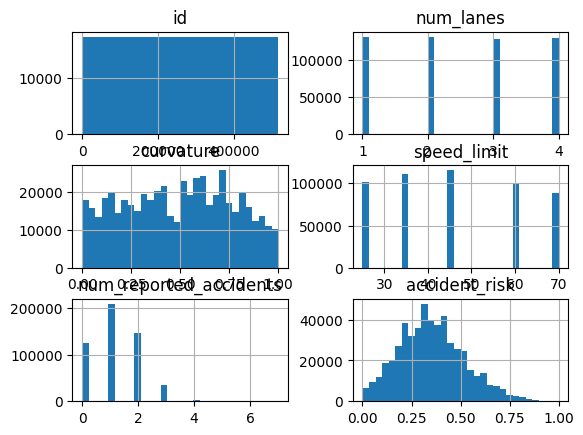

In [20]:
df.hist(bins=30)

## 5. Split the Data into Training Set (80%) and Test Set (20%)

In [21]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(len(train_set), len(test_set))

414203 103551


## 6. Create a Model

In [22]:
# I still need to do the train/test split with the training data

reg = LinearRegression()

X = train_set[['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']]
y = train_set["accident_risk"]

reg.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## 7. Evaluate the performance of the model

In [23]:
print("The bias is " , reg.intercept_)
print("The feature coefficients are ", reg.coef_)
print("The score for the training set is", reg.score(X,y))

# Check the performance on the test set

X_test = test_set[['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']]
y_test = test_set["accident_risk"]
print("The score for the test set is", reg.score(X_test,y_test))

The bias is  -0.037170261047897446
The feature coefficients are  [2.31831450e-04 3.18685972e-01 4.46223336e-03 2.31163282e-02]
The score for the training set is 0.4926215003142421
The score for the test set is 0.49403005747645556
